# Predicción de Calidad del Vino

Cargamos los datos

In [1]:
import pandas as pd
ds_path = "data/WineQT.csv"
df = pd.read_csv(ds_path)

Exploramos los datos

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Se observan que los tipos de datos corresponden. En el caso de quality, se trata de una variable categorica representada por números, más adelante la convertiremos

In [3]:
df["quality"].unique().tolist()

[5, 6, 7, 4, 8, 3]

Observamos los valores unicos de quality

Continuamos con la exploración de los datos

In [4]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


Visualizamos la cabecera, luego las últimas entradas

In [5]:
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1133,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7,1584
1134,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6,1586
1135,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6,1587
1136,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6,1590
1137,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6,1591
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


Verificamos los valores descriptivos

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [7]:
from utils import get_categoric_columns
categoric_columns = get_categoric_columns(df)
categoric_columns

[]

## Identificación de valores nulos y outliers

iniciamos buscando valores duplicados

In [8]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 0


No se observan valores duplicados, procederemos a verificar valores nulos

Ahora valores nulos

In [9]:
from utils import get_nulll_data_info
get_nulll_data_info(df)

,datos sin NAs en q,Na en q,Na en %
fixed acidity,1143,0,0.0
volatile acidity,1143,0,0.0
citric acid,1143,0,0.0
residual sugar,1143,0,0.0
chlorides,1143,0,0.0
free sulfur dioxide,1143,0,0.0
total sulfur dioxide,1143,0,0.0
density,1143,0,0.0
pH,1143,0,0.0
sulphates,1143,0,0.0


El dataframe se encuentra libre de valores nulos

In [10]:
df.drop("Id", axis=1, inplace=True)

Ahora verificamos los outliers

In [11]:
from utils import get_outliers_data
get_outliers_data(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
N° Outliers,44.000000,14.000000,1.000000,110.000000,77.000000,18.000000,40.000000,36.000000,20.000000,43.00000,12.000000,22.000000
% Outliers,3.849519,1.224847,0.087489,9.623797,6.736658,1.574803,3.499563,3.149606,1.749781,3.76203,1.049869,1.924759
Lim. mix,4.100000,0.021250,-0.405000,0.850000,0.040000,-14.000000,-39.000000,0.992157,2.912500,0.28000,7.100000,3.500000
Lim. max,12.100000,1.011250,0.915000,3.650000,0.120000,42.000000,121.000000,1.001257,3.692500,1.00000,13.500000,7.500000


Vemos que existen varios outliers en el dataset

Visualizamos las gráficas de cajas de nuestras columnas

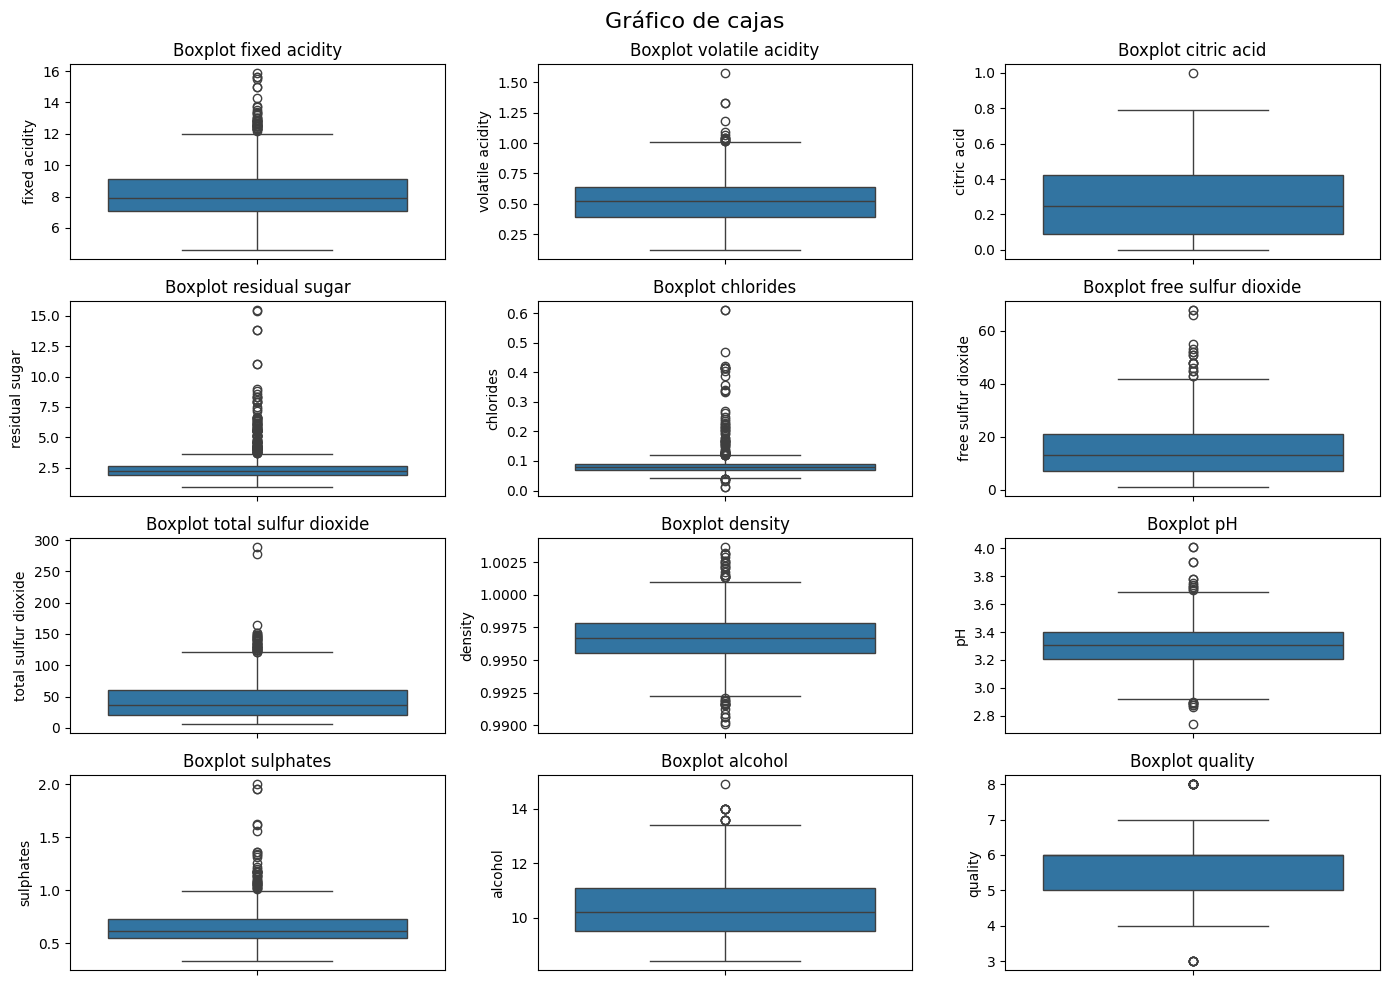

In [12]:
from utils import graph_boxplot, get_numeric_columns
graph_boxplot(df, columns=get_numeric_columns(df))

Ahora visualizaremos los histogramas de las diferentes columnas numéricas para entender mejor la distribución

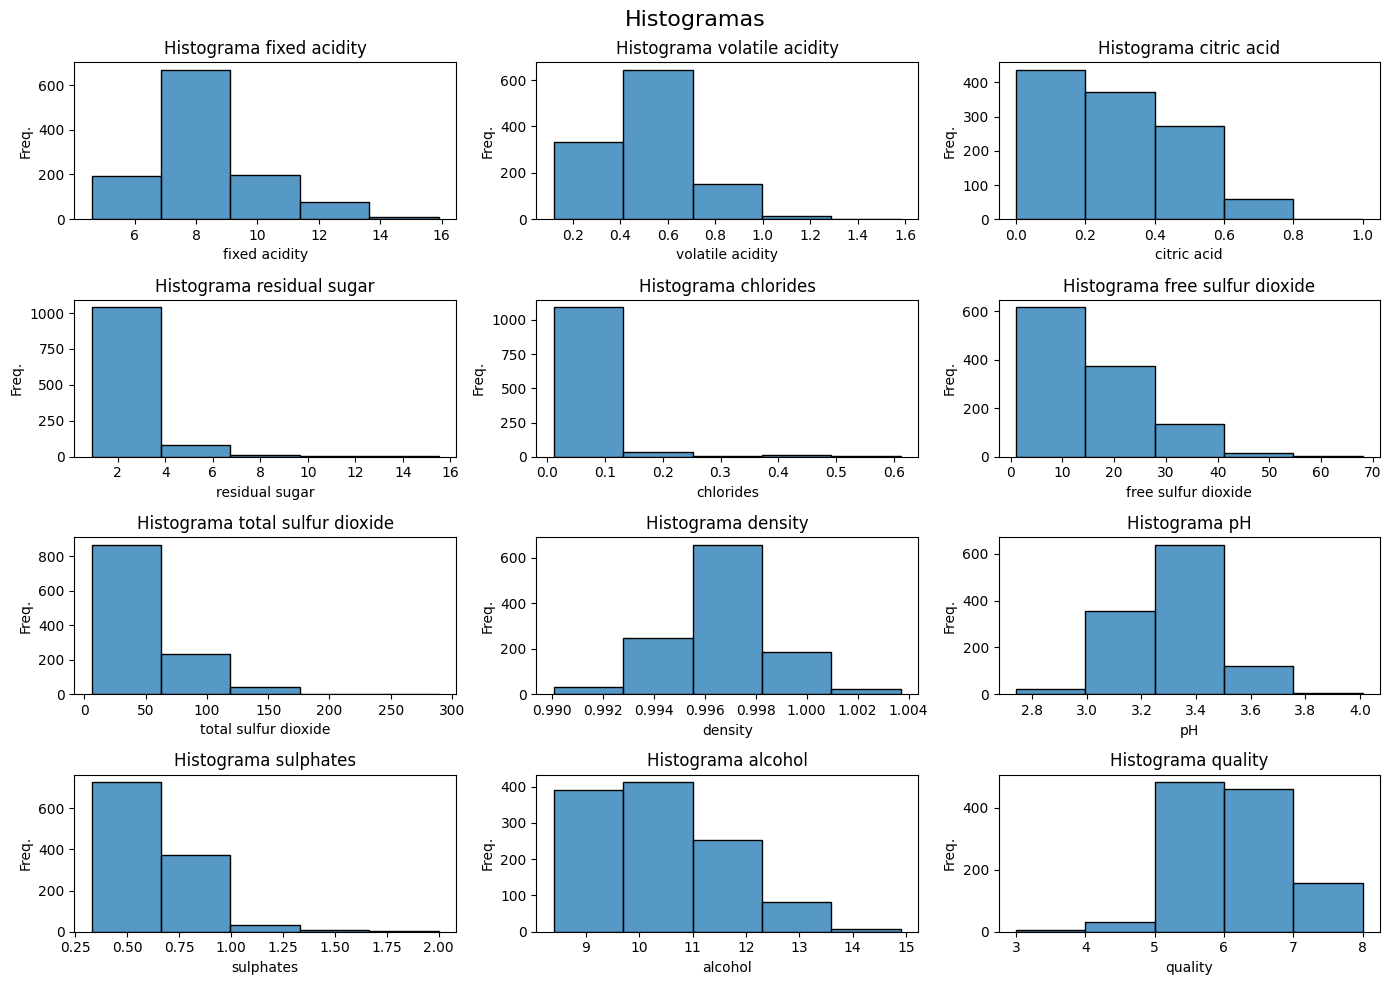

In [13]:
from utils import graph_histogram
graph_histogram(df, get_numeric_columns(df))

Se observan distribuciones normales

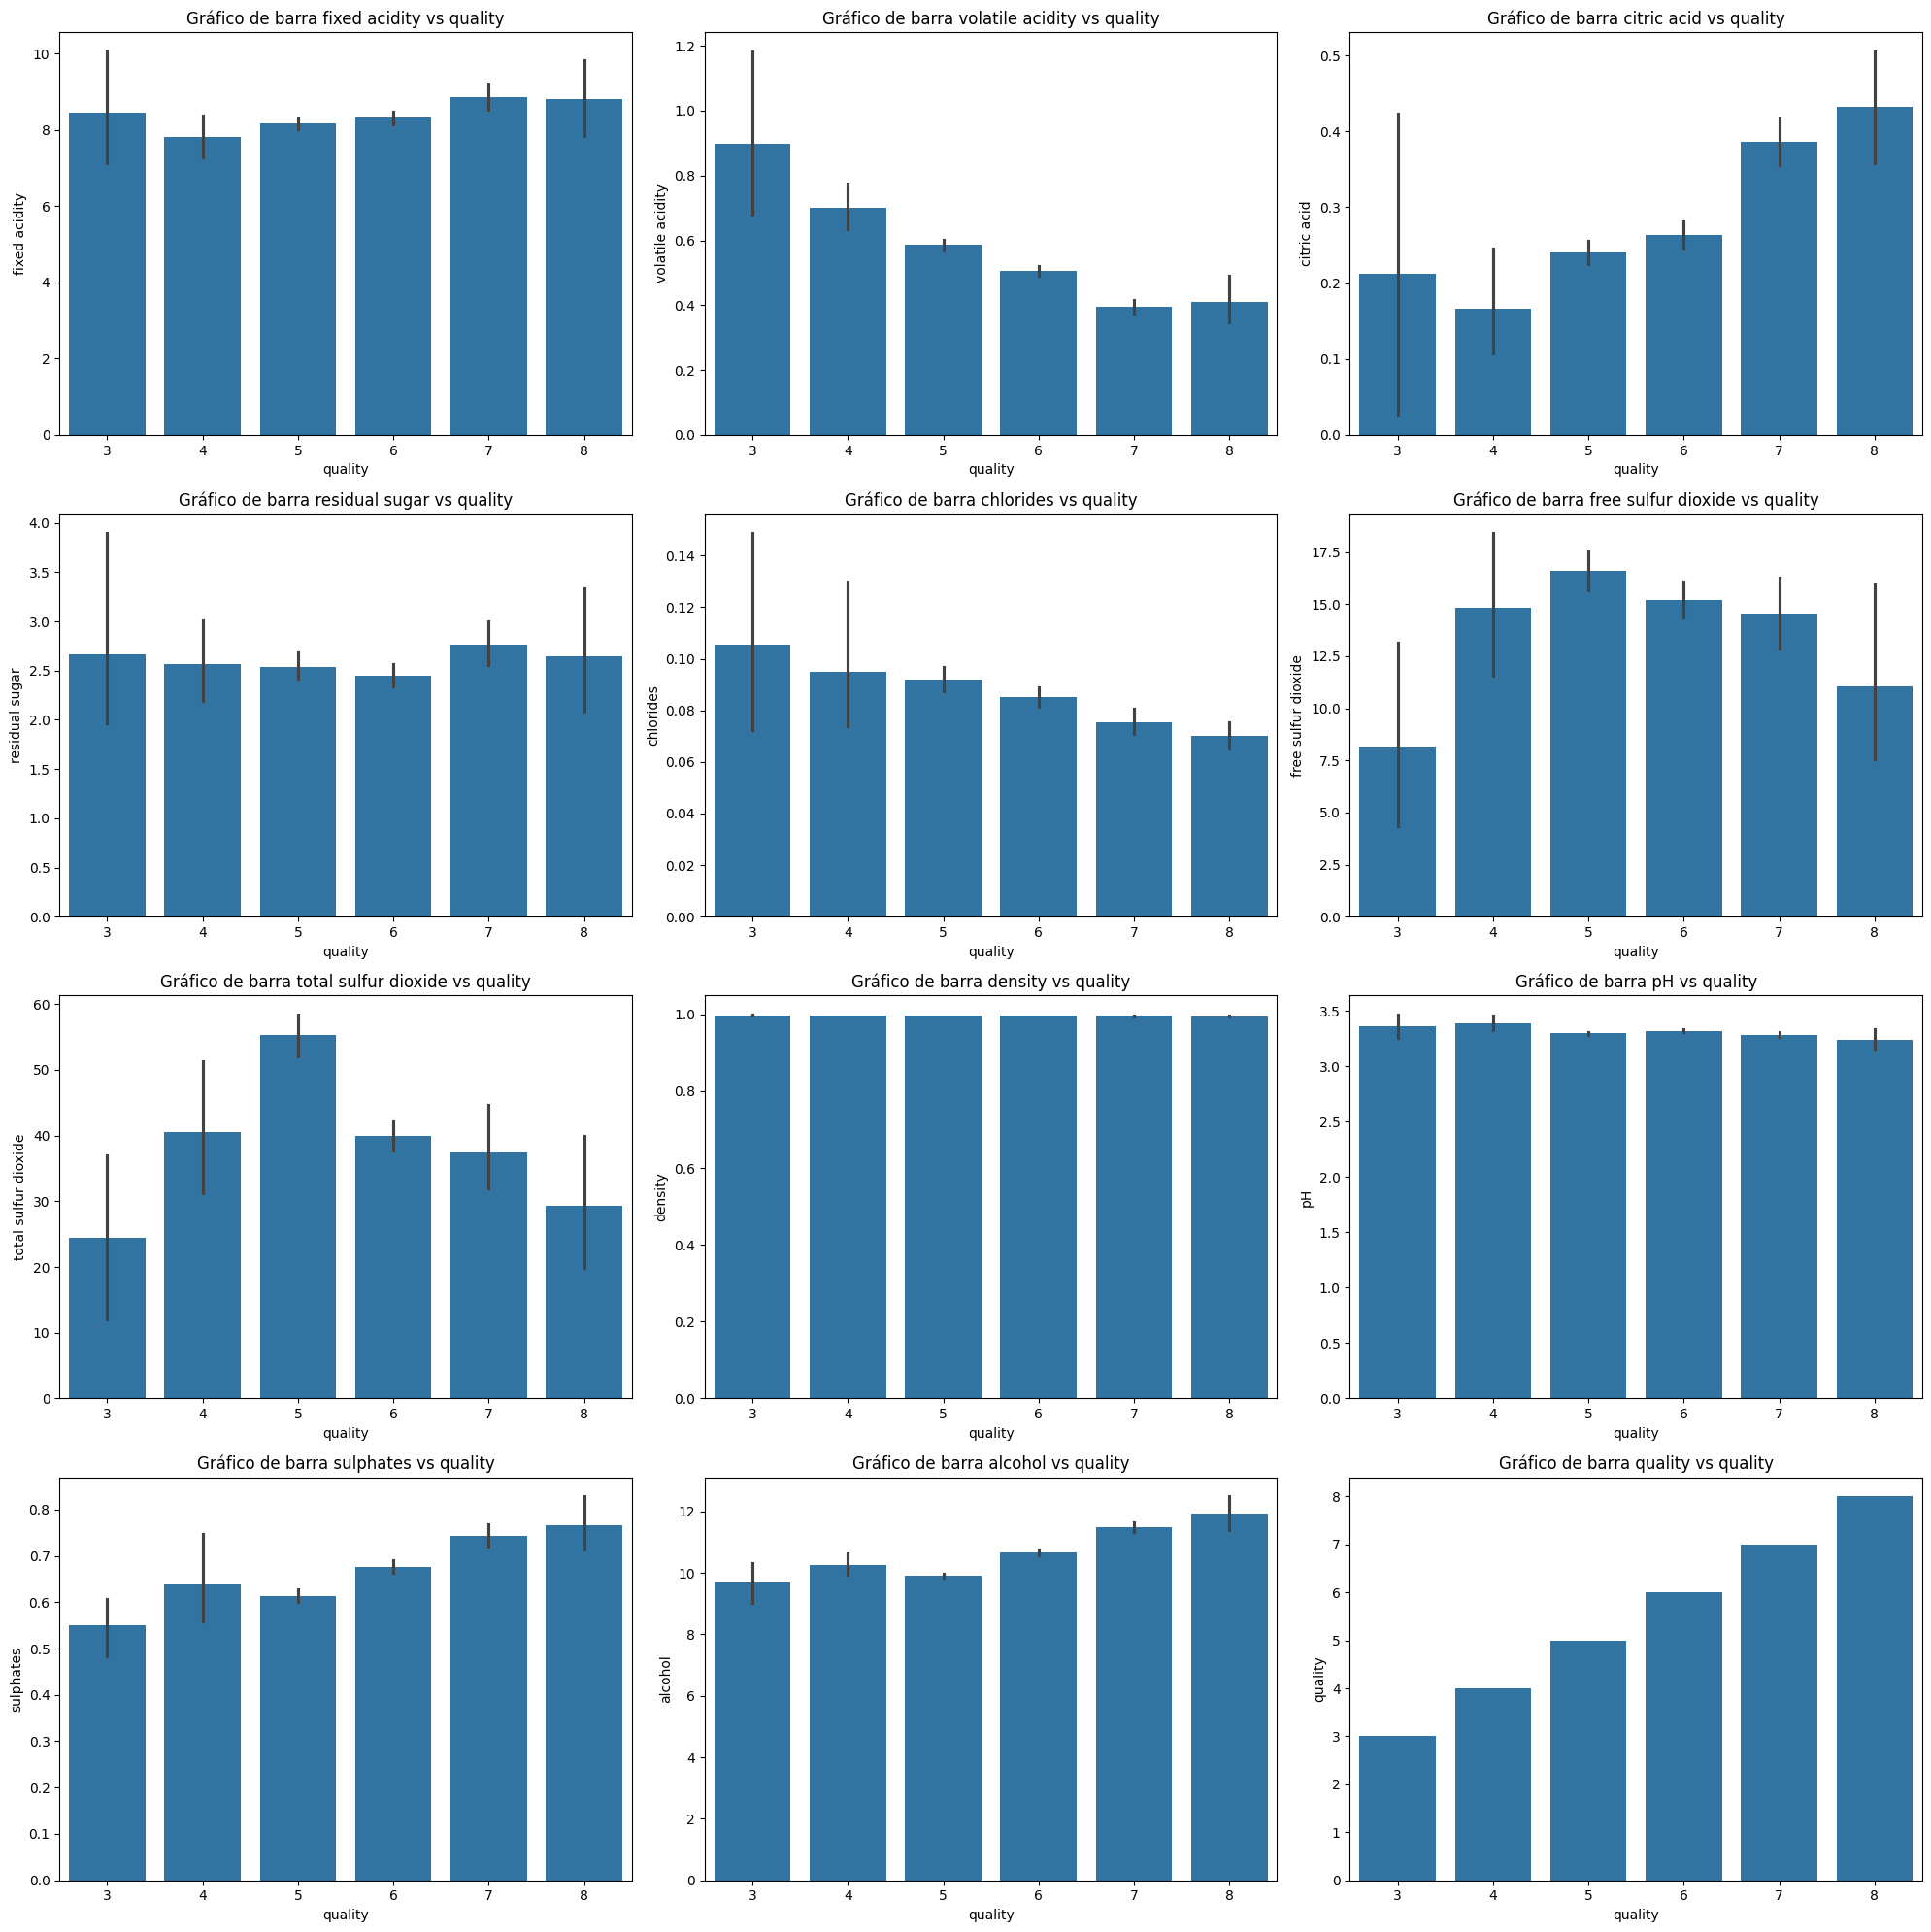

In [14]:
from utils import graph_barplot
graph_barplot(df, get_numeric_columns(df), "quality", figsize=(20,20))

Las columnas densidad y PH al parecer influyen de forma despreciable a la calidad

In [15]:

important_columns = get_numeric_columns(df)
corr_matrix = df[important_columns].corr(method="pearson")
spearmann = df[important_columns].corr(method="spearman")
kendall = df[important_columns].corr(method="kendall")
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


Ahora graficamos el mapa de calor de las correlaciones

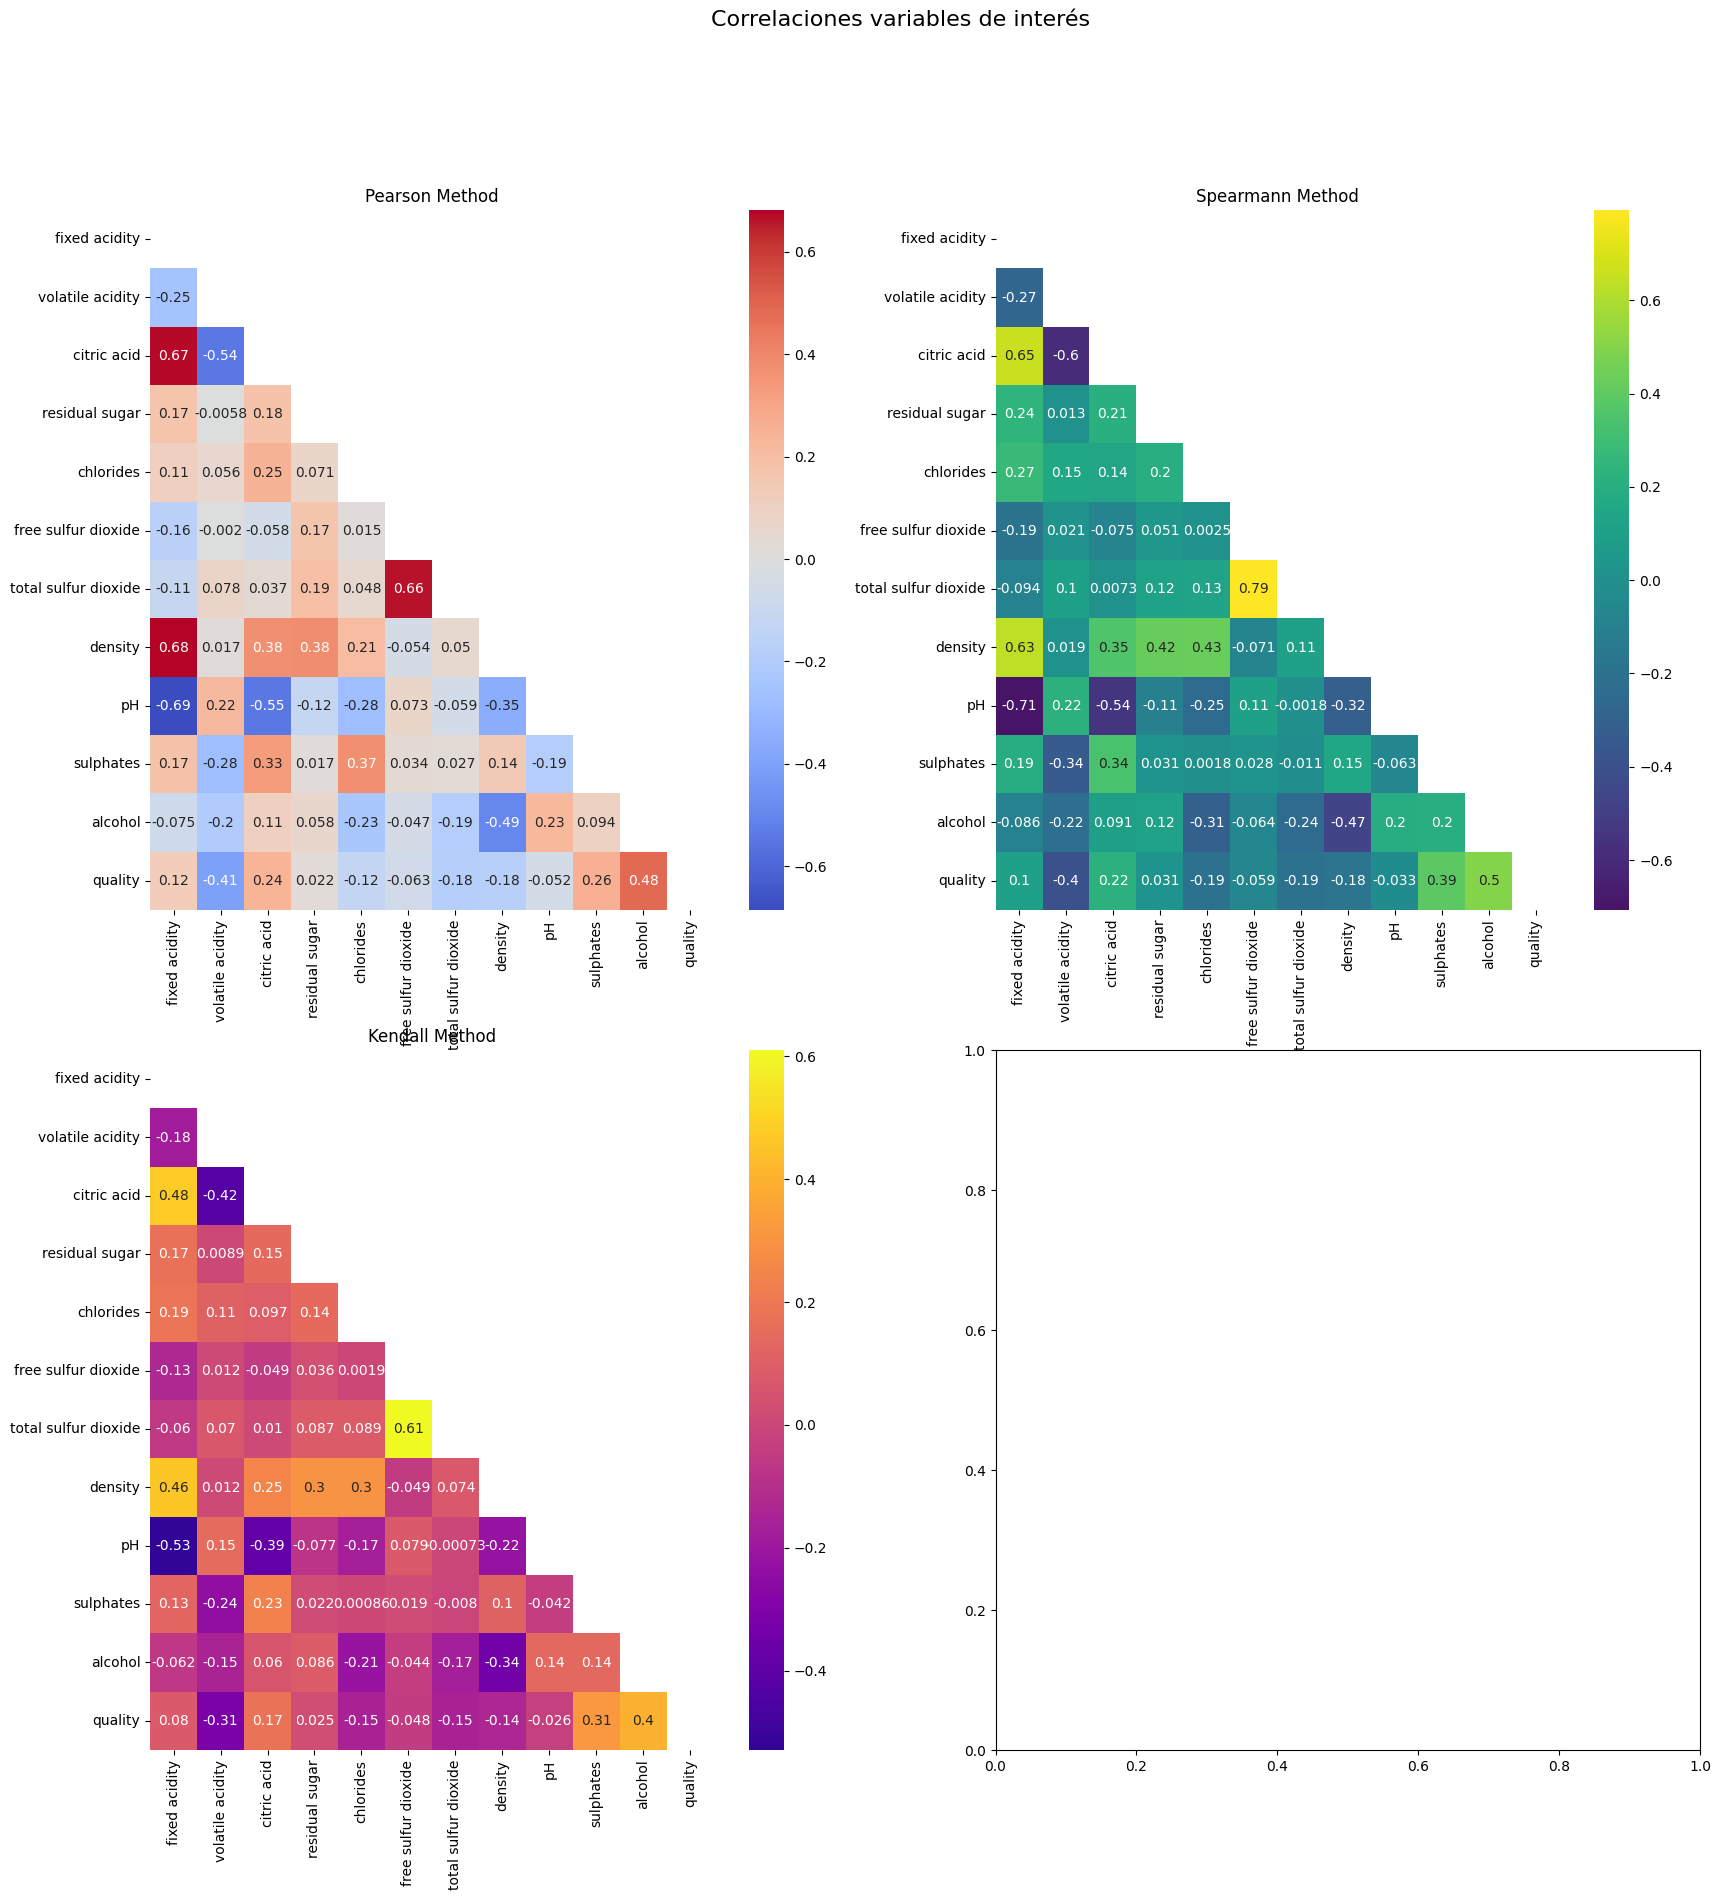

In [16]:
from utils import graph_correlations
graph_correlations(corr_matrix, spearmann, kendall, "Correlaciones variables de interés", figsize= (20,20))

Balanceamos la muestra ya que existen muchos valores para una categoria, pero no tantos para otra

In [17]:
df.groupby("quality", observed=False).count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,6,6,6,6,6,6,6,6,6,6,6
4,33,33,33,33,33,33,33,33,33,33,33
5,483,483,483,483,483,483,483,483,483,483,483
6,462,462,462,462,462,462,462,462,462,462,462
7,143,143,143,143,143,143,143,143,143,143,143
8,16,16,16,16,16,16,16,16,16,16,16


Observamos que la calidad con mayor numero es 483 para quality 5.

In [18]:
df_3 = df[df.quality==3]
df_4 = df[df.quality==4]      
df_5 = df[df.quality==5]
df_6 = df[df.quality==6]
df_7 = df[df.quality==7]
df_8 = df[df.quality==8]

guardamos los valores para las calidades

In [19]:
from sklearn.utils import resample
q3_upsampled = resample(df_3, replace=True, n_samples=483, random_state=15) 
q4_upsampled = resample(df_4, replace=True, n_samples=483, random_state=15) 
q6_upsampled = resample(df_6, replace=True, n_samples=483, random_state=15) 
q7_upsampled = resample(df_7, replace=True, n_samples=483, random_state=15) 
q8_upsampled = resample(df_8, replace=True, n_samples=483, random_state=15) 

Ahora rebalanceamos

In [20]:
balanced_df = pd.concat([q3_upsampled, q4_upsampled, df_5, q6_upsampled, q7_upsampled, q8_upsampled]).reset_index(drop=True)
print(balanced_df.quality.value_counts())

quality
3    483
4    483
5    483
6    483
7    483
8    483
Name: count, dtype: int64


ahora seleccionaremos las características importantes

In [21]:
columnas_numericas = get_numeric_columns(df)

columnas_numericas

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

Preparamos los datos: observamos que las caracteristicas adecuadas para la clasificación son los siguientes

In [22]:
predict_num_columns = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol'
 ]
X = balanced_df[[*predict_num_columns]]
y = balanced_df["quality"]

Dividimos el dataset en 70% para entrenamiento, 30% para pruebas

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

Escalamos las caracteristicas

In [24]:
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creamos y entrenamos los modelos

### K-Nearest Neighbours

Buscamos el mejor valor de K

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_values = list(range(1, 21))
mse_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
    scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error', cv=4)
    mse_scores.append(scores.mean())
best_k = k_values[mse_scores.index(max(mse_scores))]
print(f'Mejor valor de K: {best_k}')

Mejor valor de K: 1


Entrenamos el modelo KNN

In [26]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Random Forest

Realizamos las pruebas con diferentes parámetros

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf = RandomForestClassifier()

param_grid = { 
    'n_estimators': list(range(1, 50)),
    'max_depth': list(range(1, 10)),
    'random_state': [0,]
}


CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv=4, verbose=2)
CV_rfc.fit(X_train, y_train)

Fitting 4 folds for each of 441 candidates, totalling 1764 fits
[CV] END ........max_depth=1, n_estimators=1, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=1, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=1, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=1, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=2, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=2, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=2, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=2, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=3, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=3, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=3, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=3,

/home/benja/.pyenv/versions/3.12.3/envs/dojo/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'random_state': [0]},
             verbose=2)

Observamos los mejores parámetros

In [28]:
params = CV_rfc.best_params_

params

{'max_depth': 9, 'n_estimators': 35, 'random_state': 0}

Entrenamos el modelo

In [29]:
rf_params_cv = RandomForestClassifier(**params)

rf_params_cv.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=35, random_state=0)

### Regresión Logística

Creamos el modelo y entrenamos

In [30]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(
    penalty='l2',           # Tipo de regularización L2 (Ridge)
    C=1.0,                   # Inverso de la fuerza de regularización
    solver='lbfgs',          # Algoritmo para la optimización
    max_iter=100,            # Número máximo de iteraciones
    tol=1e-4,                # Tolerancia para el criterio de parada
    random_state=42 # Semilla para la reproducibilidad
)         

# Entrenar el modelo
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Evaluamos los modelos

### KNN

In [31]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    root_mean_squared_error, r2_score, mean_absolute_error
)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Exactitud:accuracy_knn {accuracy_knn}')
classification_report_knn = classification_report(y_test, y_pred_knn)
print('Informe de Clasificación:')
print(classification_report_knn)

rmse_knn = root_mean_squared_error(y_test, y_pred_knn)
mse_knn = rmse_knn ** 2
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)


Exactitud:accuracy_knn 0.8988505747126436
Informe de Clasificación:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       141
           4       0.94      1.00      0.97       161
           5       0.80      0.68      0.74       141
           6       0.76      0.74      0.75       137
           7       0.90      0.95      0.93       144
           8       0.96      1.00      0.98       146

    accuracy                           0.90       870
   macro avg       0.89      0.89      0.89       870
weighted avg       0.89      0.90      0.90       870



In [32]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print('Matriz de Confusión KNN:')
params = CV_rfc.best_params_
conf_matrix_knn

Matriz de Confusión KNN:


array([[141,   0,   0,   0,   0,   0],
       [  0, 161,   0,   0,   0,   0],
       [  0,   8,  96,  30,   4,   3],
       [  0,   3,  21, 101,  11,   1],
       [  0,   0,   3,   2, 137,   2],
       [  0,   0,   0,   0,   0, 146]])

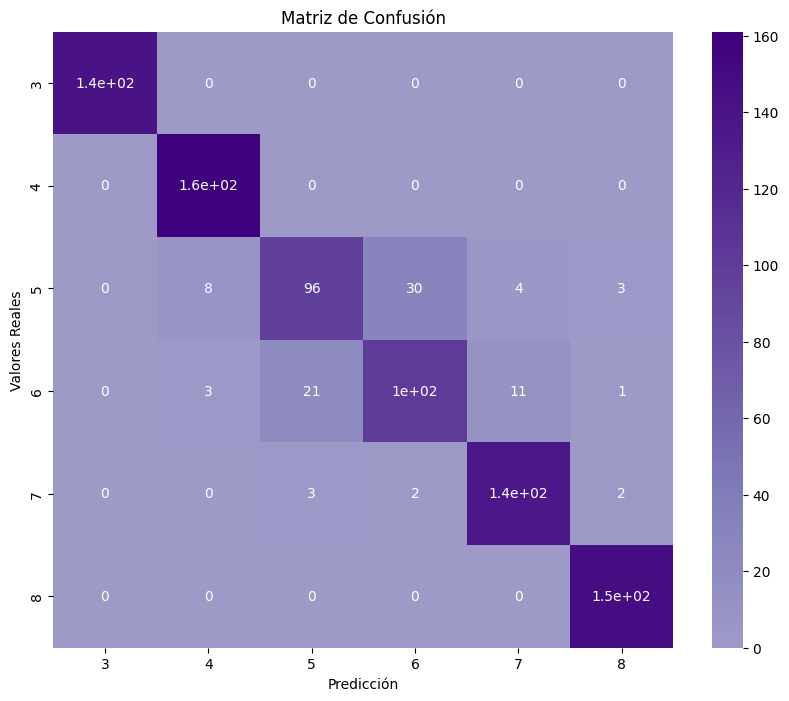

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns

_, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_knn,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax1,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks(), labels=["3", "4", "5", "6", "7", "8"])
ax1.set_yticks(ticks=ax1.get_yticks(), labels=["3", "4", "5", "6", "7", "8"])
plt.title("Matriz de Confusión")
plt.show()

### Random Forest

In [34]:
# Realizar predicciones
y_pred_rf = rf_params_cv.predict(X_test)

# Evaluar el modelo
accuracy_rf_cv = accuracy_score(y_test, y_pred_rf)

print(f'Exactitud:accuracy_rf_cv {accuracy_rf_cv}')
classification_report_rf_cv = classification_report(y_test, y_pred_rf)
print('Informe de Clasificación:')
print(classification_report_rf_cv)

# Matriz de Confusión
conf_matrix_rf_cv = confusion_matrix(y_test, y_pred_rf)
print('Matriz de Confusión Random Forests:')
print(conf_matrix_rf_cv)


# Evaluar el modelo
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
mse_rf = rmse_rf ** 2
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Error Cuadrático Medio: {mse_rf}')
print(f'Error Cuadrático Medio Raíz: {rmse_rf}')
print(f'R-cuadrado: {r2_rf}')
print(f'Error Absoluto Medio: {mae_rf}')

Exactitud:accuracy_rf_cv 0.906896551724138
Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.99      1.00      0.99       141
           4       0.98      1.00      0.99       161
           5       0.82      0.77      0.79       141
           6       0.76      0.71      0.73       137
           7       0.88      0.94      0.91       144
           8       0.99      1.00      0.99       146

    accuracy                           0.91       870
   macro avg       0.90      0.90      0.90       870
weighted avg       0.90      0.91      0.90       870

Matriz de Confusión Random Forests:
[[141   0   0   0   0   0]
 [  0 161   0   0   0   0]
 [  2   4 108  23   4   0]
 [  0   0  24  97  15   1]
 [  0   0   0   7 136   1]
 [  0   0   0   0   0 146]]
Error Cuadrático Medio: 0.11724137931034483
Error Cuadrático Medio Raíz: 0.34240528516707336
R-cuadrado: 0.95998809652635
Error Absoluto Medio: 0.10114942528735632


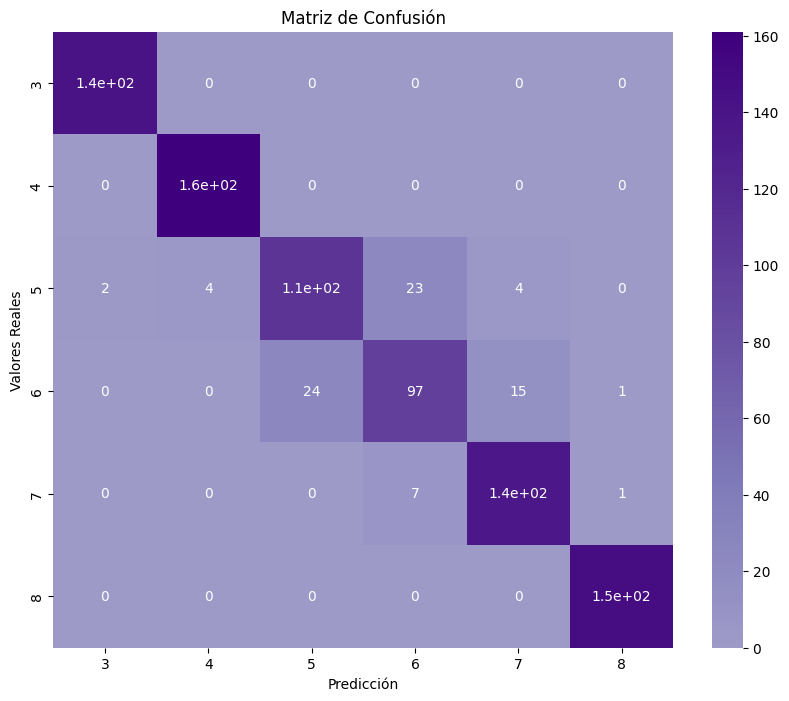

In [35]:
_, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_rf_cv,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax1,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks(), labels=["3", "4", "5", "6", "7", "8"])
ax1.set_yticks(ticks=ax1.get_yticks(), labels=["3", "4", "5", "6", "7", "8"])
ax1.set_title('Random Forest')
plt.title("Matriz de Confusión")
plt.show()

Regresión Logística

In [36]:
y_pred_lr = lr.predict(X_test)
accuracy_lr_cv = accuracy_score(y_test, y_pred_lr)
print(f'Exactitud:accuracy_lr_cv {accuracy_lr_cv}')
classification_report_lr_cv = classification_report(y_test, y_pred_lr)
print('Informe de Clasificación:')
print(classification_report_lr_cv)
conf_matrix_lr_cv = confusion_matrix(y_test, y_pred_lr)
print('Matriz de Confusión Logistic Regression:')
print(conf_matrix_lr_cv)

# Evaluar el modelo
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)
mse_lr = rmse_lr ** 2
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f'Error Cuadrático Medio: {mse_lr}')
print(f'Error Cuadrático Medio Raíz: {rmse_lr}')
print(f'R-cuadrado: {r2_lr}')
print(f'Error Absoluto Medio: {mae_lr}')

Exactitud:accuracy_lr_cv 0.5712643678160919
Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.82      1.00      0.90       141
           4       0.65      0.48      0.55       161
           5       0.52      0.60      0.56       141
           6       0.38      0.36      0.37       137
           7       0.40      0.44      0.42       144
           8       0.64      0.56      0.60       146

    accuracy                           0.57       870
   macro avg       0.57      0.57      0.57       870
weighted avg       0.57      0.57      0.57       870

Matriz de Confusión Logistic Regression:
[[141   0   0   0   0   0]
 [ 16  77  42  23   0   3]
 [ 10  21  84  17   4   5]
 [  1  15  33  49  30   9]
 [  3   5   2  40  64  30]
 [  0   0   0   0  64  82]]
Error Cuadrático Medio: 0.850574712643678
Error Cuadrático Medio Raíz: 0.922266074754828
R-cuadrado: 0.7097175630343037
Error Absoluto Medio: 0.5471264367816092


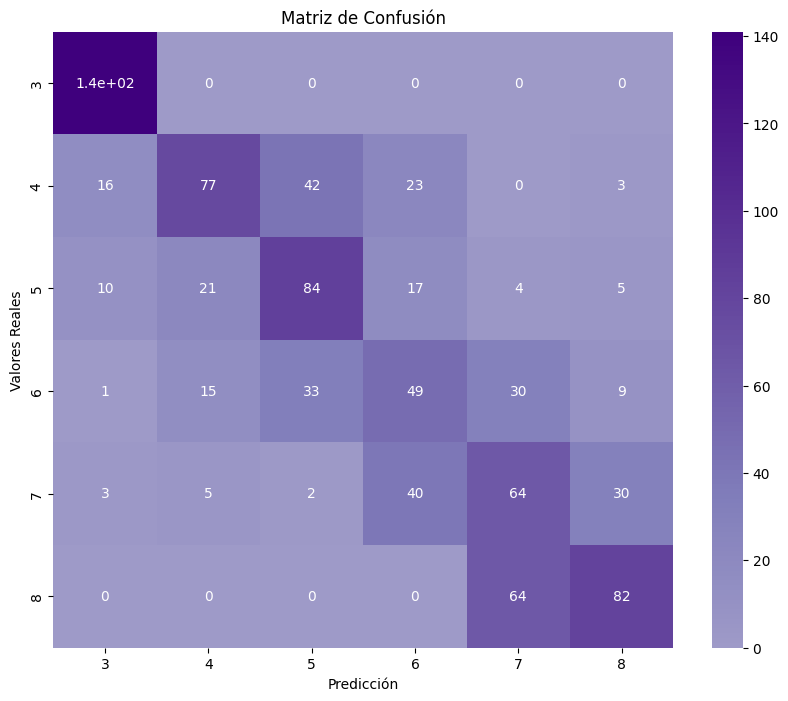

In [37]:
_, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_lr_cv,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax1,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks(), labels=["3", "4", "5", "6", "7", "8"])
ax1.set_yticks(ticks=ax1.get_yticks(), labels=["3", "4", "5", "6", "7", "8"])
ax1.set_title('Logistic Regression')
plt.title("Matriz de Confusión")
plt.show()

Comparamos

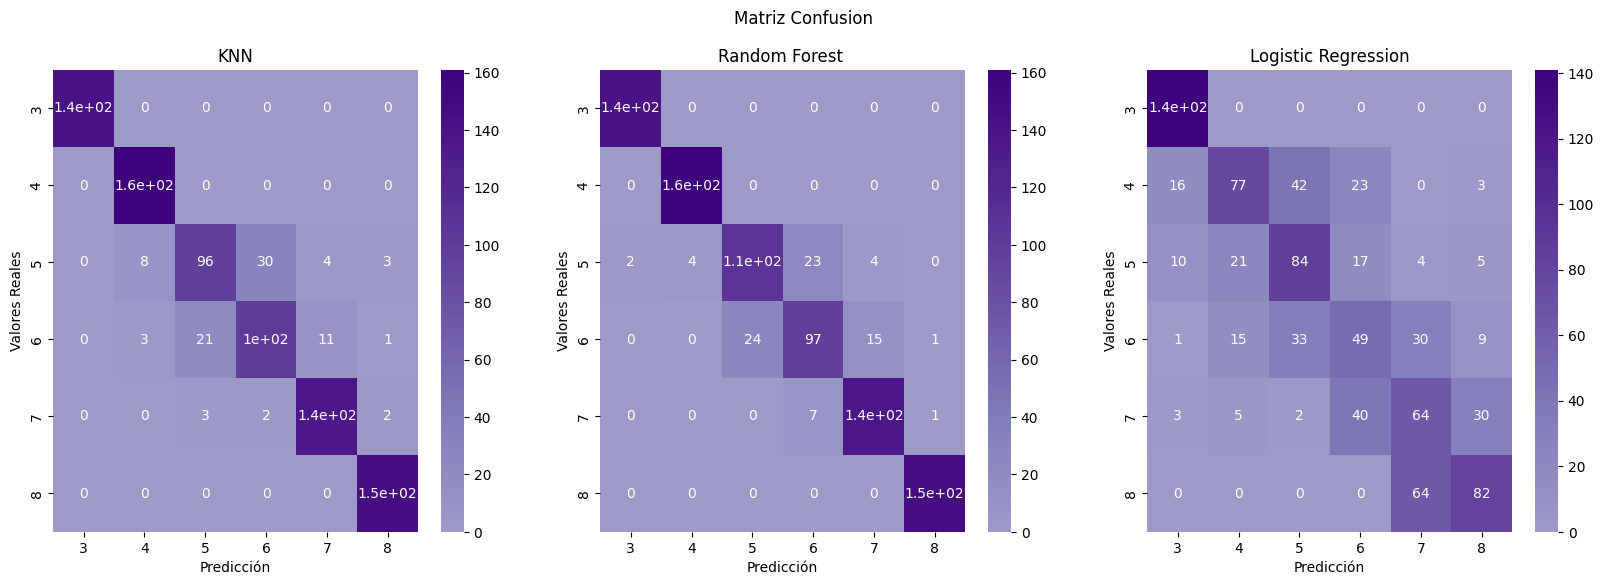

In [38]:
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
ax1, ax2, ax3 = axes.flatten()
sns.heatmap(
    conf_matrix_knn,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax1,
)
sns.heatmap(
    conf_matrix_rf_cv,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax2,
)
sns.heatmap(
    conf_matrix_lr_cv,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax3,
)
ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks(), labels=["3", "4", "5", "6", "7", "8"])
ax1.set_yticks(ticks=ax1.get_yticks(), labels=["3", "4", "5", "6", "7", "8"])
ax1.set_title('KNN')
ax2.set_xlabel("Predicción")
ax2.set_ylabel("Valores Reales")
ax2.set_xticks(ticks=ax2.get_xticks(), labels=["3", "4", "5", "6", "7", "8"])
ax2.set_yticks(ticks=ax2.get_yticks(), labels=["3", "4", "5", "6", "7", "8"])
ax2.set_title('Random Forest ')
ax3.set_xlabel("Predicción")
ax3.set_ylabel("Valores Reales")
ax3.set_xticks(ticks=ax3.get_xticks(), labels=["3", "4", "5", "6", "7", "8"])
ax3.set_yticks(ticks=ax3.get_yticks(), labels=["3", "4", "5", "6", "7", "8"])
ax3.set_title('Logistic Regression')
plt.suptitle('Matriz Confusion')
plt.show()

Observando los 3 resultados podemos decir que el mejor modelo es Random Forest, seguido de cerca por KNN. Ambos ofrecen buena exactitud, pero Random Forest es más consistente en todas las métricas y maneja mejor la variabilidad entre clases. La Regresión Logística no es adecuada para este problema, ya que tiene un desempeño significativamente peor.


Random Forest:

Exactitud (Accuracy): 90.7% (la mejor de los 3).

Macro Avg (F1-Score): 0.90 (la mejor en promedio).

Error Cuadrático Medio (RMSE): 0.342 (el menor, indicando mejor ajuste).


KNN:

Exactitud (Accuracy): 89.9% (muy cerca de Random Forest).

Macro Avg (F1-Score): 0.89.

RMSE: 0.408 (peor que Random Forest, pero mejor que Regresión Logística).


Regresión Logística:

Exactitud (Accuracy): 57.1% (la peor).

Macro Avg (F1-Score): 0.57.

RMSE: 0.922 (el más alto, indicando mal ajuste).



In [47]:
y_test[2:3]

22    3
Name: quality, dtype: int64

In [48]:
y_pred_rf[0:1]

array([7])

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer


fpr = dict()
tpr = dict()
roc_auc = dict()

binarizer = LabelBinarizer()

y_test_binarized = binarizer.fit_transform(y_test)
y_pred_rf_binarized = binarizer.transform(y_pred_rf)

classes = binarizer.classes_
n_classes = len(classes)

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_rf_binarized.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_rf_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.94
Macro-averaged One-vs-Rest ROC AUC score:
0.94


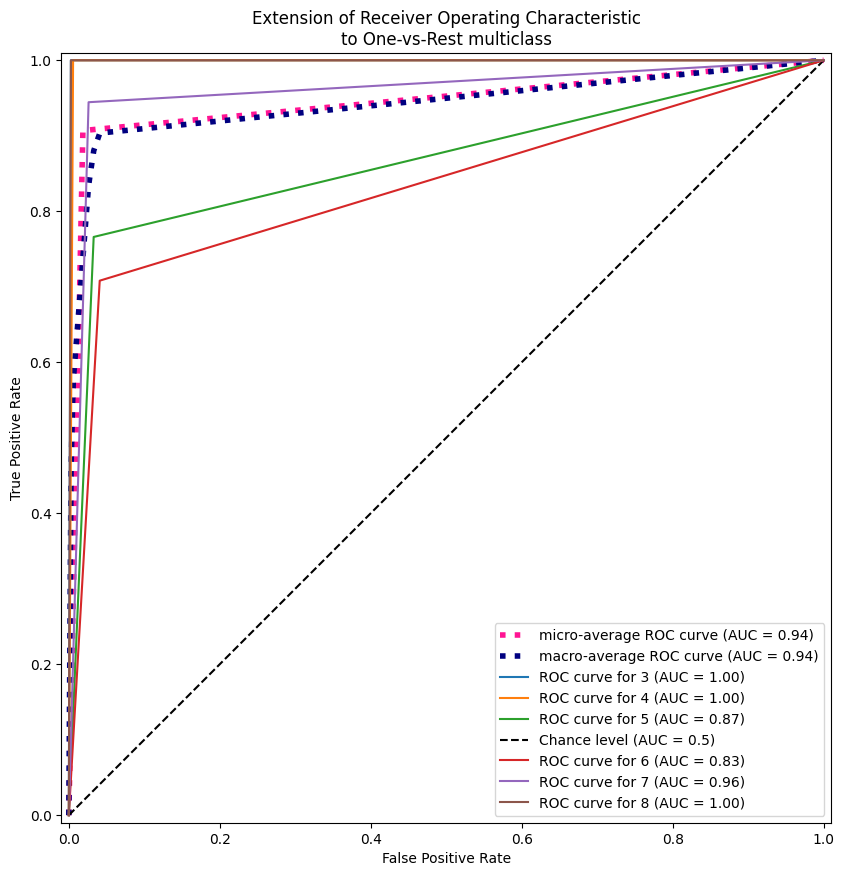

In [50]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

for class_id in range(0, n_classes):
    RocCurveDisplay.from_predictions(
        y_test_binarized[:, class_id],
        y_pred_rf_binarized[:, class_id],
        name=f"ROC curve for {classes[class_id]}",
        ax=ax,
        plot_chance_level=(class_id == 2),
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)